# Using Methyltransferase Targeting Assay to study chromosome interaction at a genome-wide scale

## Introduction

Chromosome interaction plays an important role in eukaryotic gene regulation and many methods have been developed to study the dynamic chromosome interaction, including 3C, 4C and Hi-C. However, these chemical based methods rely on a crosslink that immobilizes the dynamic chromosome interactions, it is still under debate regarding the bias introduced by chemical crosslink. And discrepancies between microscopy based chromosome structure and chemical based structure have been reported. To overcome these problems, here I describe a new tool to study chromosome interactions at a genome-wide scale based on a methyltransferase targeting assay. LacO sites were inserted into region of interest and a LacI-MCviPI (a GpC methyltransferase) fusion protein was expressed and recruited to LacO insertion site in budding yeast. A strain with mutant LacO sites was generated as a control. By searching for the hypermethylated regions in yeast strain with wild-type LacO sites that generated by the proximity to fusion protein target across the whole genome, the interactions between the hypermethylated regions and the LacO insertion site are captured. To simplify, Here I only focus on the interaction regions on chromosome III, which is where LacO sites were inserted. 

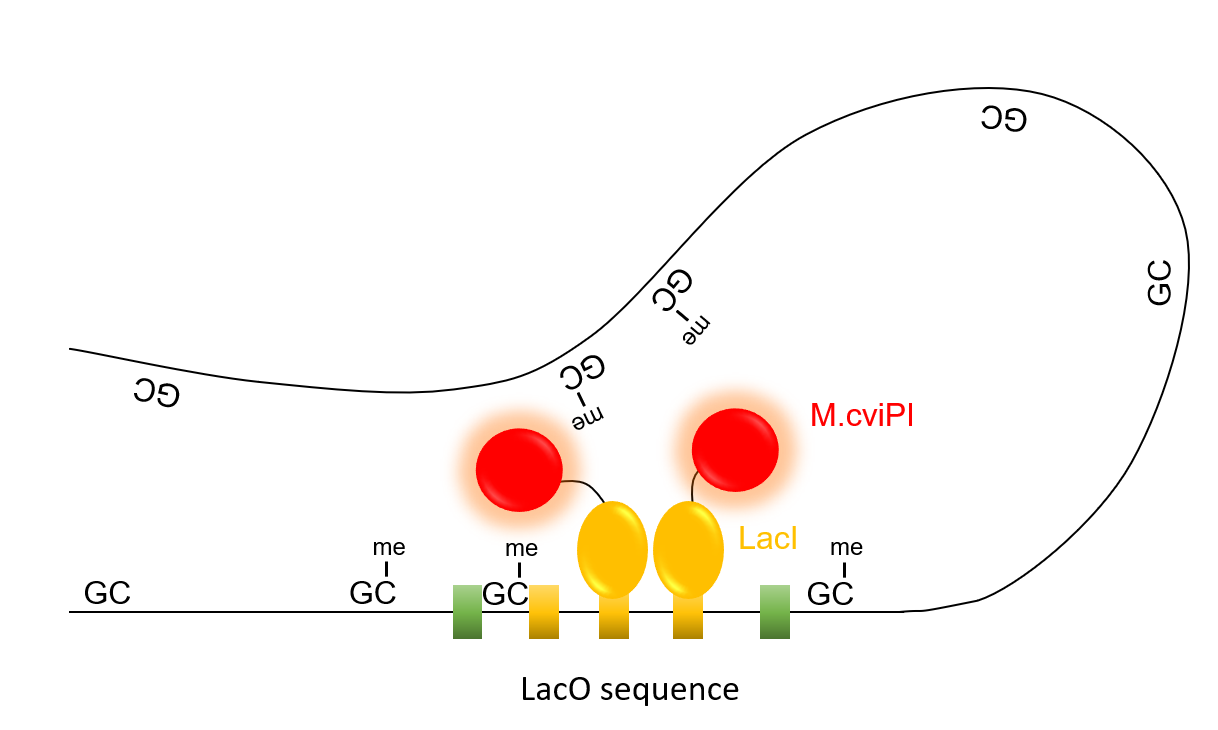

In [0]:
from IPython.core.display import Image
Image ('https://raw.githubusercontent.com/yzl452/BMMB554/master/design.png')

## Result

### Pre-analysis treatment

The wt strain and mut strain was constructed by intergrate 4X LacO arrays and 4X mutant LacO arrays into chrIII, downstream of the MATa gene, and a LacI-MCviPI fusion gene driven by a Gal1 promoter is intergrated into HO gene locus. Then the fusion protein is induced by addtion of beta-estradiol. Cells were fragmented and sequenced by Whole-Genome Bisulfite Sequencing, which converts all unmethylated C into T. The reads were mapped to the genome using Bismark three-letter method. The methylation information was extracted by methylPipe software and analyzed by further analysis.

### Partition GpC

The methylation information extracted by methylPipe contains the number of Cs and Ts at every cytosine loci across the genome, however, we only focus on cytosine in GpC content. So we need to partition the Cs into GpC content and non-GpC content. First let's download the methylation information:

In [0]:
!wget https://raw.githubusercontent.com/yzl452/BMMB554/master/wt_All_chrIII.txt
!wget https://raw.githubusercontent.com/yzl452/BMMB554/master/mut_All_chrIII.txt

--2019-07-19 15:24:01--  https://raw.githubusercontent.com/yzl452/BMMB554/master/wt_All_chrIII.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3039867 (2.9M) [text/plain]
Saving to: ‘wt_All_chrIII.txt’

wt_All_chrIII.txt   100%[===================>]   2.90M  --.-KB/s    in 0.1s    

2019-07-19 15:24:06 (29.5 MB/s) - ‘wt_All_chrIII.txt’ saved [3039867/3039867]

--2019-07-19 15:24:07--  https://raw.githubusercontent.com/yzl452/BMMB554/master/mut_All_chrIII.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3045695 (2.9M) [text/plain]
Sav

In [0]:
!head wt_All_chrIII.txt

chr	loci	strand	cont	methy	unmethy
chrIII	378	+	CHH	0	1
chrIII	380	+	CHH	0	1
chrIII	383	+	CHH	0	1
chrIII	384	+	CHH	0	1
chrIII	385	+	CHH	0	1
chrIII	390	+	CHH	0	2
chrIII	394	+	CHH	0	2
chrIII	395	+	CHH	0	2
chrIII	396	+	CHG	0	2


 Because the insertion site of LacO is on chrIII and wt have different sequence with mutant, we need to download the reference chrIII for both wt and mutant strain:

In [0]:
!wget https://raw.githubusercontent.com/yzl452/BMMB554/master/chrIII_wt.fa
!wget https://raw.githubusercontent.com/yzl452/BMMB554/master/chrIII_mut.fa

--2019-07-19 15:24:17--  https://raw.githubusercontent.com/yzl452/BMMB554/master/chrIII_wt.fa
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317951 (310K) [text/plain]
Saving to: ‘chrIII_wt.fa’

chrIII_wt.fa        100%[===================>] 310.50K  --.-KB/s    in 0.05s   

2019-07-19 15:24:17 (6.10 MB/s) - ‘chrIII_wt.fa’ saved [317951/317951]

--2019-07-19 15:24:18--  https://raw.githubusercontent.com/yzl452/BMMB554/master/chrIII_mut.fa
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 317951 (310K) [text/plain]
Saving to: ‘chrIII_mut.fa’


In [0]:
!head chrIII_mut.fa

CCCACACACCACACCCACACCACACCCACACACCACACACACCACACCCACACACCCACACCACACCACACCCACACCACACCCACACACCCACACCCACACACCACACCCACACACACCACACCCACACACACCCACACCCACACACCACACCCACACACACACCACACCCACACACACCACACCACACCCACACCACACCCACACCCACACACCACACCCACACCCACACCCCACACCCACACACCACACCCACACACACCACACCCACACACACCCACACCACACCCACACACCACACCCACACACCCACACCCACACACACCACACCCACACCACACCCACACCCACACACCCACACCCTAACACTACCCTAACACTACCCTATTCTAACCCTGATTTTACCTGTCTCCCAACTTACTCTCCATTACCCTACCTCTCCACTCGTTACCCTGTCTCATTCAACCGTACCACTCCCAACCACCATCCATCTCTCTACTTACTACCACCAACCCACCGTCCACCATAACCGTTACCCTCCAACTACCCGTATCCAACTCCACTACCGCTTACCCTACCATCGACCATGTCCTACTCACTGTACTGTTGTTCACCCACCATATTGAAACGTCTACAAATGATCGTAAATAATACACATATACTTATCCTACCACTCTAATCCCACTACCACATGCCATACTCACCTTCACTTGTATTCTGATCGGTCATACGCACACGGATGCTACAGTATATACCATCTCAAACTTACCCTACTTTCATATTCCACTCCATCACCCATCTCTCACCATCAGTACCAAATGCACTCGCATCATTATGCACGGCACTTGCCTCAGCGGTCTATACCCTGTGCCATTTACGCATAACGCCCATCATTATCCACATTTTAATATCTATATCTCATTCGGCGACACCAAATATTGTATAACTGCCCTTAATACATACGTTATACCACTTTTACACCATATACTAACCACTCAAT

To partition GpC, let's first get the indexes of all GpCs on chrIII

In [0]:
chr3 = open("chrIII_wt.fa", 'r')
chrIII = chr3.read().replace('\n', '')
GC_position = []
# find the positions of Cs in GC context
def posit(chr):
    positions = 0
    while positions + 1 < len(chr):
        if chr[positions] == "G" and chr[positions + 1] == "C":
            GC_position.append(positions + 1)
            GC_position.append(positions + 2)
        positions += 1
    return(GC_position)
posit(chrIII)

[568,
 569,
 694,
 695,
 732,
 733,
 742,
 743,
 821,
 822,
 827,
 828,
 837,
 838,
 842,
 843,
 848,
 849,
 854,
 855,
 870,
 871,
 879,
 880,
 886,
 887,
 926,
 927,
 949,
 950,
 1102,
 1103,
 1151,
 1152,
 1158,
 1159,
 1170,
 1171,
 1201,
 1202,
 1217,
 1218,
 1276,
 1277,
 1328,
 1329,
 1403,
 1404,
 1438,
 1439,
 1447,
 1448,
 1452,
 1453,
 1480,
 1481,
 1502,
 1503,
 1521,
 1522,
 1524,
 1525,
 1533,
 1534,
 1603,
 1604,
 1605,
 1606,
 1618,
 1619,
 1655,
 1656,
 1683,
 1684,
 1686,
 1687,
 1718,
 1719,
 1734,
 1735,
 1751,
 1752,
 1793,
 1794,
 1832,
 1833,
 1848,
 1849,
 1877,
 1878,
 1891,
 1892,
 1918,
 1919,
 1932,
 1933,
 2001,
 2002,
 2009,
 2010,
 2043,
 2044,
 2076,
 2077,
 2085,
 2086,
 2144,
 2145,
 2154,
 2155,
 2160,
 2161,
 2173,
 2174,
 2195,
 2196,
 2246,
 2247,
 2255,
 2256,
 2275,
 2276,
 2280,
 2281,
 2288,
 2289,
 2314,
 2315,
 2342,
 2343,
 2394,
 2395,
 2460,
 2461,
 2481,
 2482,
 2502,
 2503,
 2574,
 2575,
 2623,
 2624,
 2651,
 2652,
 2689,
 2690,
 2693,
 

Then we use indexes to search for correct GpC

In [0]:
import pandas as pd
import numpy as np

In [0]:
wt_data = pd.read_csv('wt_All_chrIII.txt',delimiter='\t')
wt_data

,chr,loci,strand,cont,methy,unmethy
0,chrIII,378,+,CHH,0,1
1,chrIII,380,+,CHH,0,1
2,chrIII,383,+,CHH,0,1
3,chrIII,384,+,CHH,0,1
4,chrIII,385,+,CHH,0,1
5,chrIII,390,+,CHH,0,2
6,chrIII,394,+,CHH,0,2
7,chrIII,395,+,CHH,0,2
8,chrIII,396,+,CHG,0,2
9,chrIII,398,-,CHG,0,12


In [0]:
index = np.array(GC_position)
index

array([   568,    569,    694, ..., 317700, 317762, 317763])

Then we get data in GpC content

In [0]:
wt_chr = wt_data.loc[wt_data['chr'] == "chrIII"]
wt_chr

,chr,loci,strand,cont,methy,unmethy
0,chrIII,378,+,CHH,0,1
1,chrIII,380,+,CHH,0,1
2,chrIII,383,+,CHH,0,1
3,chrIII,384,+,CHH,0,1
4,chrIII,385,+,CHH,0,1
5,chrIII,390,+,CHH,0,2
6,chrIII,394,+,CHH,0,2
7,chrIII,395,+,CHH,0,2
8,chrIII,396,+,CHG,0,2
9,chrIII,398,-,CHG,0,12


In [0]:
wt_chrIII_GC = wt_data.loc[wt_data['loci'].isin(index)]
wt_chrIII_GC

,chr,loci,strand,cont,methy,unmethy
95,chrIII,568,-,CG,0,35
96,chrIII,569,+,CHH,0,3
146,chrIII,694,-,CHH,0,43
147,chrIII,695,+,CHH,0,7
163,chrIII,732,-,CG,0,41
164,chrIII,733,+,CHH,0,8
169,chrIII,742,-,CHH,0,41
170,chrIII,743,+,CHH,0,8
201,chrIII,821,-,CHH,0,32
202,chrIII,822,+,CHH,0,9


Then we do the same thing for mutant strain, and get the GpC methylation data in mut strain:

In [0]:
chr3 = open("chrIII_mut.fa", 'r')
chrIII = chr3.read().replace('\n', '')
GC_position = []
# find the positions of Cs in GC context
def posit(chr):
    positions = 0
    while positions + 1 < len(chr):
        if chr[positions] == "G" and chr[positions + 1] == "C":
            GC_position.append(positions + 1)
            GC_position.append(positions + 2)
        positions += 1
    return(GC_position)
posit(chrIII)
mut_data = pd.read_csv('mut_All_chrIII.txt',delimiter='\t')
index = np.array(GC_position)
mut_chrIII_GC = mut_data.loc[mut_data['loci'].isin(index)]
mut_chrIII_GC

,chr,loci,strand,cont,methy,unmethy
138,chrIII,568,-,CG,0,49
139,chrIII,569,+,CHH,1,9
189,chrIII,694,-,CHH,0,49
190,chrIII,695,+,CHH,0,13
206,chrIII,732,-,CG,0,49
207,chrIII,733,+,CHH,0,11
212,chrIII,742,-,CHH,0,51
213,chrIII,743,+,CHH,0,10
244,chrIII,821,-,CHH,2,51
245,chrIII,822,+,CHH,0,14


Now we get the GpC methylation data from both wild type LacO strain and mutant LacO strain, the next step is to compare them and find hypermethylated regions in wild type. These regions are likely to be the regions with proximity to target insertion site, in other words, they have interactions with the target site.

### Find DMR

Before we start finding the hypermethylated regions in wild type LacO strain, we need to find the common loci between wt and mut. This is because later on we are going to do statistical test on them and we don't want to include non-common loci into analysis:

In [0]:
index1 = np.array(wt_chrIII_GC.loci)
index2 = np.array(mut_chrIII_GC.loci)
wt_chrIII_GC_common = wt_chrIII_GC.loc[wt_chrIII_GC['loci'].isin(index2)]
mut_chrIII_GC_common = mut_chrIII_GC.loc[mut_chrIII_GC['loci'].isin(index1)]

For the convenience of analysis, let's combine wt and mut data together:

In [0]:
wt_chrIII_common = wt_chrIII_GC_common.reset_index(drop = True)
mut_chrIII_common = mut_chrIII_GC_common.reset_index(drop = True)
mut_chrIII_common.columns = ['m_chrIII','m_loci','m_strand','m_cont','m_methy','m_unmethy']
chrIII_common = wt_chrIII_common.join(mut_chrIII_common[['m_methy','m_unmethy']])
chrIII_common

,chr,loci,strand,cont,methy,unmethy,m_methy,m_unmethy
0,chrIII,568,-,CG,0,35,0,49
1,chrIII,569,+,CHH,0,3,1,9
2,chrIII,694,-,CHH,0,43,0,49
3,chrIII,695,+,CHH,0,7,0,13
4,chrIII,732,-,CG,0,41,0,49
5,chrIII,733,+,CHH,0,8,0,11
6,chrIII,742,-,CHH,0,41,0,51
7,chrIII,743,+,CHH,0,8,0,10
8,chrIII,821,-,CHH,0,32,2,51
9,chrIII,822,+,CHH,0,9,0,14


Now we have the data contains number of methylated and unmethylated C in common single locus of both wt and mut strain, we can do statistical test on the fraction of methylation to find the hypermethylated regions in wt strain. However, we found that if we only look at single locus, no statistical difference can be found. Thus we will use 5 neighboring loci as a bin size:

In [0]:
wt_methy_5 = chrIII_common.methy.rolling(5, center = True, min_periods = 1).sum()
wt_unmethy_5 = chrIII_common.unmethy.rolling(5, center = True, min_periods = 1).sum()
mut_methy_5 = chrIII_common.m_methy.rolling(5, center = True, min_periods = 1).sum()
mut_unmethy_5 = chrIII_common.m_unmethy.rolling(5, center = True, min_periods = 1).sum()

In [0]:
loci_5 = pd.DataFrame(chrIII_common.loci)
a = pd.DataFrame(wt_methy_5)
b = pd.DataFrame(wt_unmethy_5)
c = pd.DataFrame(mut_methy_5)
d = pd.DataFrame(mut_unmethy_5)
chrIII_5GC = loci_5.join(a).join(b).join(c).join(d)
chrIII_5GC

,loci,methy,unmethy,m_methy,m_unmethy
0,568,0.0,81.0,1.0,107.0
1,569,0.0,88.0,1.0,120.0
2,694,0.0,129.0,1.0,169.0
3,695,0.0,102.0,1.0,131.0
4,732,0.0,140.0,0.0,173.0
5,733,0.0,105.0,0.0,134.0
6,742,0.0,130.0,2.0,172.0
7,743,0.0,98.0,2.0,137.0
8,821,0.0,122.0,2.0,179.0
9,822,0.0,91.0,2.0,143.0


Then we can do statistical test based on the fraction of methylation, use the two-proportion z-test:

In [0]:
chrIII_5GC['wt_sum'] = chrIII_5GC['methy'] + chrIII_5GC['unmethy']
chrIII_5GC['mut_sum'] = chrIII_5GC['m_methy'] + chrIII_5GC['m_unmethy']
chrIII_5GC['wt_frac'] = chrIII_5GC['methy'] / chrIII_5GC['wt_sum']
chrIII_5GC['mut_frac'] = chrIII_5GC['m_methy'] / chrIII_5GC['mut_sum']
chrIII_5GC

,loci,methy,unmethy,m_methy,m_unmethy,wt_sum,mut_sum,wt_frac,mut_frac,p
0,568,0.0,81.0,1.0,107.0,81.0,108.0,0.000000,0.009259,0.351173
1,569,0.0,88.0,1.0,120.0,88.0,121.0,0.000000,0.008264,0.355797
2,694,0.0,129.0,1.0,169.0,129.0,170.0,0.000000,0.005882,0.350801
3,695,0.0,102.0,1.0,131.0,102.0,132.0,0.000000,0.007576,0.347705
4,732,0.0,140.0,0.0,173.0,140.0,173.0,0.000000,0.000000,NaN
5,733,0.0,105.0,0.0,134.0,105.0,134.0,0.000000,0.000000,NaN
6,742,0.0,130.0,2.0,172.0,130.0,174.0,0.000000,0.011494,0.187071
7,743,0.0,98.0,2.0,137.0,98.0,139.0,0.000000,0.014388,0.193536
8,821,0.0,122.0,2.0,179.0,122.0,181.0,0.000000,0.011050,0.200641
9,822,0.0,91.0,2.0,143.0,91.0,145.0,0.000000,0.013793,0.209488


two proportion t-test:

In [0]:
from numpy import sqrt, abs, round
from scipy.stats import norm
p1 = chrIII_5GC['wt_frac'].astype(float)
p2 = chrIII_5GC['mut_frac'].astype(float)
n1 = chrIII_5GC['wt_sum'].astype(float)
n2 = chrIII_5GC['mut_sum'].astype(float)
p = (p1+p2)/2
import math
c = (p*(1-p)*(1/n1+1/n2))
z = (p1-p2)/sqrt(c)
cdf1 = norm.cdf(-abs(z))
cdf2 = norm.cdf(abs(z))
cut = cdf2 - cdf1
pvalue = 1 - cut
chrIII_5GC['p'] = pvalue

/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/usr/local/lib/python3.6/dist-packages/scipy/stats/_distn_infrastructure.py:1748: RuntimeWarning: invalid value encountered in greater_equal
  cond2 = (x >= self.b) & cond0


Then we get the P value of statistical test

In [0]:
chrIII_5GC


,loci,methy,unmethy,m_methy,m_unmethy,wt_sum,mut_sum,wt_frac,mut_frac,p
0,568,0.0,81.0,1.0,107.0,81.0,108.0,0.000000,0.009259,0.353423
1,569,0.0,88.0,1.0,120.0,88.0,121.0,0.000000,0.008264,0.357800
2,694,0.0,129.0,1.0,169.0,129.0,170.0,0.000000,0.005882,0.352226
3,695,0.0,102.0,1.0,131.0,102.0,132.0,0.000000,0.007576,0.349545
4,732,0.0,140.0,0.0,173.0,140.0,173.0,0.000000,0.000000,NaN
5,733,0.0,105.0,0.0,134.0,105.0,134.0,0.000000,0.000000,NaN
6,742,0.0,130.0,2.0,172.0,130.0,174.0,0.000000,0.011494,0.189640
7,743,0.0,98.0,2.0,137.0,98.0,139.0,0.000000,0.014388,0.196796
8,821,0.0,122.0,2.0,179.0,122.0,181.0,0.000000,0.011050,0.203160
9,822,0.0,91.0,2.0,143.0,91.0,145.0,0.000000,0.013793,0.212681


### Plot

Now let's visualize our result. For the convenience of analysis, I fill the NaN of p with 1 and set -lg(p) as negative if mut_frac > wt_frac:

In [0]:
plot = pd.DataFrame()
plot['loci'] = chrIII_5GC.loci
plot['wt_frac'] = chrIII_5GC.wt_frac
plot['mut_frac'] = chrIII_5GC.mut_frac
plot['p'] = chrIII_5GC.p
plot = plot.fillna(1)

In [0]:
temp = []
for i in range(0,len(plot.loci)):
  if plot.wt_frac[i] >= plot.mut_frac[i] and plot.p[i] != 0:
    temp.append(-math.log(plot.p[i],10))
  elif plot.wt_frac[i] < plot.mut_frac[i] and plot.p[i] != 0:
    temp.append(math.log(plot.p[i],10))
  elif plot.p[i] == 0:
    temp.append(16)

In [0]:
plot['-lgP'] = temp
plot

,loci,wt_frac,mut_frac,p,-lgP
0,568,0.000000,0.009259,0.353423,-0.451705
1,569,0.000000,0.008264,0.357800,-0.446359
2,694,0.000000,0.005882,0.352226,-0.453179
3,695,0.000000,0.007576,0.349545,-0.456497
4,732,0.000000,0.000000,1.000000,-0.000000
5,733,0.000000,0.000000,1.000000,-0.000000
6,742,0.000000,0.011494,0.189640,-0.722071
7,743,0.000000,0.014388,0.196796,-0.705984
8,821,0.000000,0.011050,0.203160,-0.692161
9,822,0.000000,0.013793,0.212681,-0.672272


Now we can plot -lg(P) against locus in order to visualize our data:
We can find that the LacO insertion site has a very high -lg(p), which indicates the local methylation of the fusion proten. We can also find several other sites that have -lg(p) > 3, in other words, pvalue < 0.001. It's likely that they form trans-interaction with the insertion site and are therefor methylated due to the proximity to the fusion protein target.

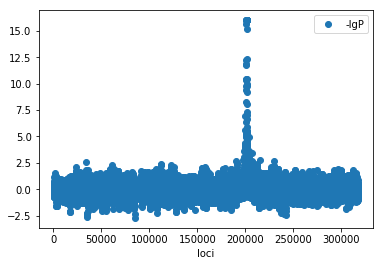

In [0]:
plot.plot(x='loci', y='-lgP', style='o')

We can also plot the raw methylation fraction data as a comparision, the insertion site of wt strain is highly methylated but that of mut strain is not. And consistent with -lg(p) plot, we can find several other hypermethylated regions in wt compared with mut.

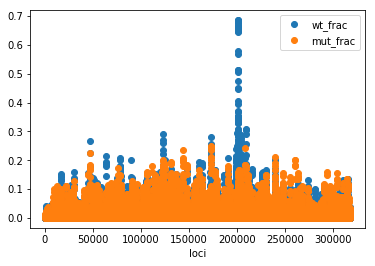

In [0]:
plot.plot(x='loci', y=['wt_frac','mut_frac'], style='o')

Basically this is the general workflow of my project. In the real project I search for hypermethylated regions across the whole genome and produce a one vs all interaction network based on the data.

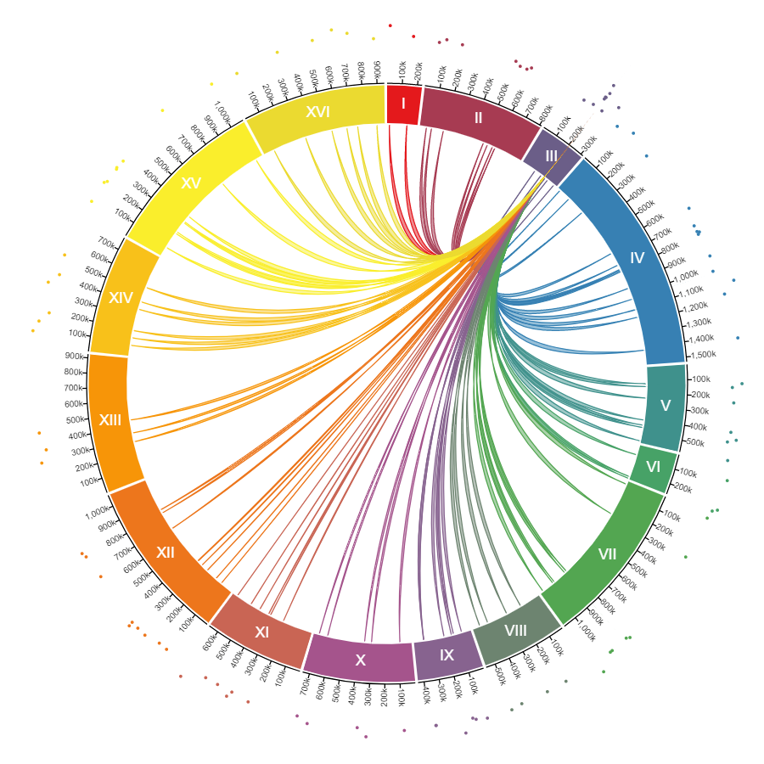

In [0]:
Image ('https://raw.githubusercontent.com/yzl452/BMMB554/master/Interaction.png')

## Discussion

It has been known that the 3D organization of chromosome plays an important role in eukaryotic gene regulation. However, the two major methods we used to study chromosomal interactions: biochemical method such as 3C, and microscopy-based method such as fluorescence in situ hybridization (FISH), have their own limitations. The 3C-based methods rely on a chemical crosslink, which may introduce bias, and the DNA FISH method is usually restricted to several candidate loci. The discrepancies between 3C-based method and DNA FISH in chromosome conformation have also been reported by several groups. Hence, we sought to develop a new method to study chromosomal interactions, which does not rely on chemical crosslink and can provide information at a genome-wide level. The method we are developing is based on a methyltransferase targeting assay. The general idea is to recruit a methyltransferase to a certain genome locus, and search for other loci that are methylated by this targeted methyltransferase due to the proximity. In our experimental design, a high affinity LacO sequence or a mutant LacO control is inserted into the region of interest, and a LacI-MCviPI(GpC methyltransferase) is expressed in budding yeast, which methylates cytosines in GpC. Thus the fusion protein is expected to be recruited to target locus and methylate neighboring interaction regions due to the proximity. The genome is then sequenced and compared with mutant-target control strain. By comparing the methylation pattern and identifying hypermethylated region in the LacO inserted strain, we capture the interactions between the target locus and other loci across the genome, which resembles the 4C method. Furthermore, we intend to generate a fusion protein library with different length of linker, which serves as a cytological ruler and enables us to estimate the chromosomal distance from the target site.